In [1]:
!pip install transformers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams

In [3]:
rcParams['figure.figsize']=10,5

In [4]:
zero_shot_classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
result = zero_shot_classifier(
  sequences = "Can you order some Pizza & book an Uber to the nearest cinema House at 10 PM?",
  candidate_labels = ["Flight Travel", "Cabs Travel", "Reminders", "Food", "Movies"],
  multi_label= True
)

In [6]:
print(result['labels'])
print(result['scores'])

['Food', 'Cabs Travel', 'Movies', 'Reminders', 'Flight Travel']
[0.9135639071464539, 0.8440094590187073, 0.7740458250045776, 0.1285540610551834, 0.000490901293233037]


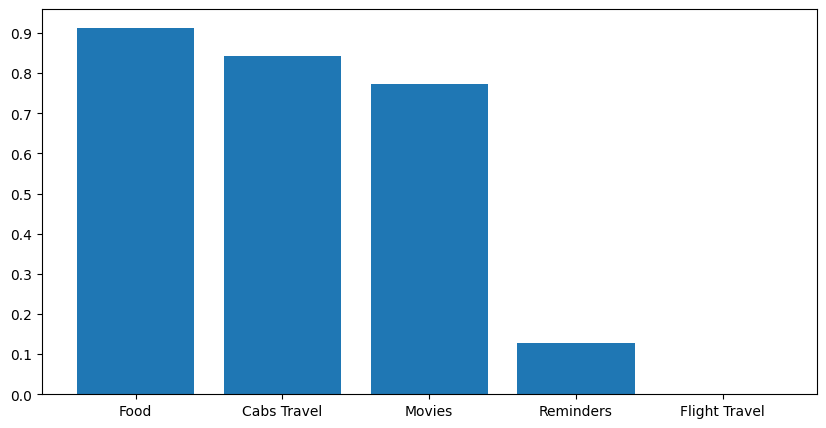

In [7]:
plt.bar(result["labels"], result["scores"])
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

In [8]:
!pip install streamlit -q
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [21]:
%%writefile app.py
import streamlit as st
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

# Function to plot probabilities
def plot_probabilities(labels, probabilities):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(labels))
    ax.barh(y_pos, probabilities, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Probability')
    ax.set_title('Label Probabilities')
    return fig

# Define a Python function
def zeroshot(text,possible_classes):
    zero_shot_classifier = pipeline("zero-shot-classification")
    result = zero_shot_classifier(
      sequences = text,
      candidate_labels = possible_classes,
      multi_label= True
    )

    return result

def main():
    st.title("Zero-Shot Text Classification")

    text = st.text_area("Enter text:", "")
    possible_classes = st.text_input("Enter possible class names (comma-separated):")
    possible_classes = [cls.strip() for cls in possible_classes.split(",")]

    if text and possible_classes:
      if st.button("Submit"):

        classification = zeroshot(text, possible_classes)

        st.subheader("Predicted Labels and Probabilities:")
        for label, score in zip(classification['labels'], classification['scores']):
            st.write(f"- {label}: {score:.4f}")

        # Plot probabilities
        fig = plot_probabilities(classification['labels'], classification['scores'])
        st.pyplot(fig)

if __name__ == "__main__":
    main()


Overwriting app.py


In [15]:
from pyngrok import ngrok

# Set authentication token if you haven't already done so
ngrok.set_auth_token("2c54S0BCzBB0ZiGw5FSS82ulUNb_7wsNuyyPb22woziTCnnXn")

In [16]:
!nohup streamlit run app.py --server.port 5011 &
# Start ngrok tunnel
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# Print the URL
print(' * Tunnel URL:', ngrok_tunnel.public_url)

nohup: appending output to 'nohup.out'
 * Tunnel URL: https://5f4c-34-125-140-192.ngrok-free.app
